MTcars dataset prediction of Fuel efficiency with Linear Regression

1. Data Exploration

1.1 Loading dataset and description of data

Import libraries needed and read in the the mtcars dataset.

In [252]:
#   Imports for data manipulation
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [253]:
df = pd.read_csv('mtcars.csv')

Can see data has 32 rows and 12 columns.

In [254]:
df.shape

(32, 12)

Can see the data has 1 object feature which is the model of the car, and 11 numeric features of the car. Data also has no missing values. Can see the target variable fuel efficiency (mpg).

In [255]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [257]:
df.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

1.2 Exploaratory data analysis

Can see the target variable mpg has a mean of 20.090625 with a standerd deviation of 6.02. 10.4 and 33.9 seem to be the min and max respectivly of mpg. Mpg seems to be normally distributed but slightly skewed to the right.  Cyl seems to be either 4,6 or 8 and vs is either 0 or 1.

In [258]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [259]:
df.cyl.value_counts()

cyl
8    14
4    11
6     7
Name: count, dtype: int64

In [260]:
df.vs.value_counts()

vs
0    18
1    14
Name: count, dtype: int64

<Axes: >

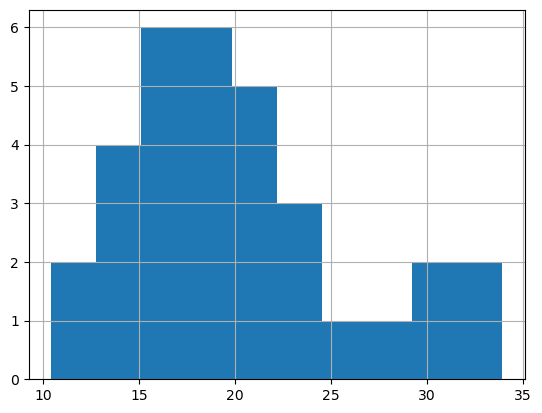

In [261]:
df.mpg.hist()

Can see a negative correlation between mpg and cyl, disp, hp, wt. Can also see a weak positive correlation between mpg and and drat. Seemingly no correlation between mpg and qsec.

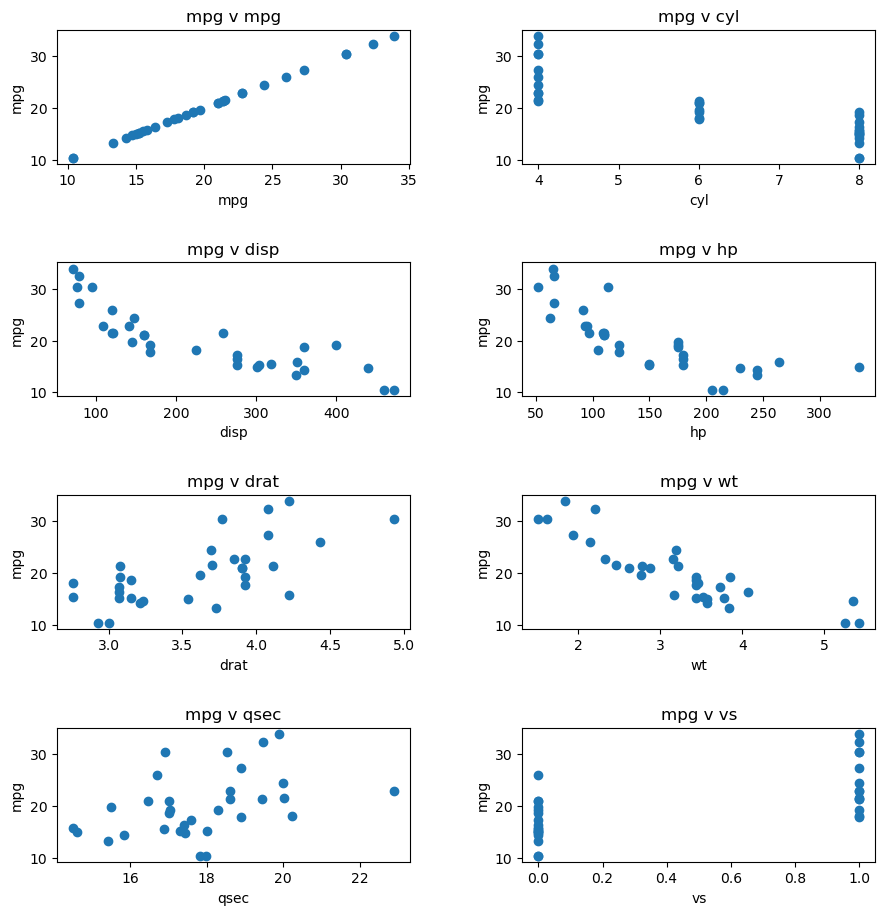

In [262]:
f, axes = plt.subplots(4,2, figsize = (10,10))
f.tight_layout(pad=5.0)

numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

k = 0
for i in range(0,4):
    for j in range(0,2):
        axes[i,j].scatter(x = numeric_cols[k], y = 'mpg', data = df)
        axes[i,j].set_xlabel(numeric_cols[k])
        axes[i,j].set_ylabel('mpg')
        axes[i,j].set_title('mpg v '+numeric_cols[k])
        k+=1

Confirmation that strongest correlation features to mpg are wt, cyl, disp and hp in that order.

In [263]:
df[numeric_cols].corr().mpg

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

2. Simple Linear Regression

2.1 Select Independent variable

Going to select wt as it has the strongest correlation to mpg. Need to reshape the input array to a a 2-D array for sklearns linear regression model. Each row will have one value as only one variable.

In [264]:
x = df.wt
y = df.mpg
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

2.2 Implement Linear regression model

Split data into training and test data. Only have 0.2 as test data as sample so small.

In [265]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=5)

Fit the model with the training inputs and their corresponding outputs. Get the predictions for the x_test data.

In [266]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

2.3 Calculate models coefficients

Can see the slope coefficient is -5.17635668 and y-intercept is 36.65966866. Can see this line along with the scatter plot of the training data. This line looks like the best fit i.e has lowest error. However one outlier at about mpg=33.9 is furthest from regression line. 

In [267]:
reg.coef_

array([[-5.17635668]])

In [268]:
reg.intercept_

array([36.65966866])

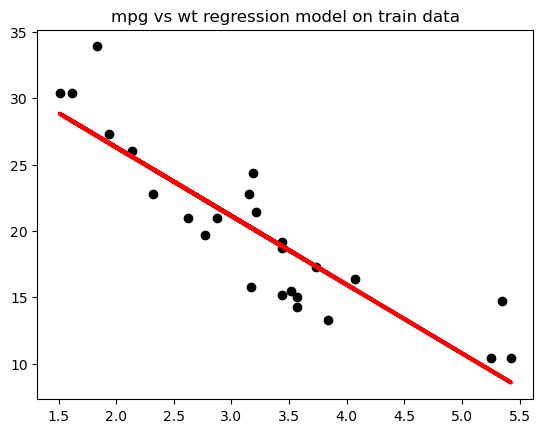

In [269]:
plt.title("mpg vs wt regression model on train data")
plt.scatter(x_train, y_train, color="black")
plt.plot(x, -5.17635668*x+36.65966866, color="red", linewidth=3)

plt.show()

2.4 Evaluate model

Going to use sklearns metrics to calculate the mean absolute error, mean squared error, root mean squared error (root of MSE) and the R^2 score.
Can see from below a low MAE of about 2.35 which means on average there was an error of 2.35. The RMSE is a bit higher at 3.13. This is probably due to the outlier seen at mpg=33 in the below scatter plot, which is penalized.
The R^2 score is 0.6314349494253246. This implies that 63% of the variability of the dependent variable in the data set has been accounted for, and the remaining 37% of the variability is still unaccounted for. This is not a bad score but not great.

In [270]:

y_pred = reg.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error

def measure(x, y, pred, model):
    print(f'MAE: {mean_absolute_error(y_true=y,y_pred=pred)}')
    print(f"MSE: {mean_squared_error(y_true=y,y_pred=pred)}")
    print(f"RMSE: {mean_squared_error(y_true=y,y_pred=pred,squared=False)}")
    print(f'R^2: {model.score(x,y)}')

measure(x_test, y_test, y_pred, reg)

MAE: 2.3480860001237747
MSE: 9.773292098238747
RMSE: 3.1262264950317893
R^2: 0.6314349494253246


Can see the error that was probably effecting the RMSE value below on the graph of the test data and the regression line.

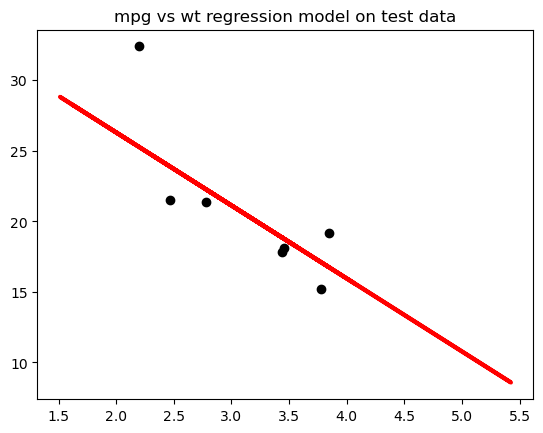

In [271]:
plt.title("mpg vs wt regression model on test data")
plt.scatter(x_test, y_test, color="black")
plt.plot(x, -5.17635668*x+36.65966866, color="red", linewidth=3)

plt.show()

3. Multiple linear regression

3.1 Implement multiple linear regression and train with multiple features

Going to select features with high correlation to mpg from the list of highest correlated features seen above (wt, cyl, disp and hp). wt is the highest correlated so I'll include that. cyl is the next highest correlated to mpg, however it is also highly correlated to the other highly correlated features such as wt and hp, so I'll exclude it to avoid multicollinearity. Same for disp. hp isn't strongly correlated to to wt so I'll include it as well as drat which is the next highest and is not strongly correlated to hp however it is strongly correlated to wt.

In [272]:
df[numeric_cols].corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


Create x_m the input vectors and y_m the corresponding outputs.

In [273]:
y_m = df.mpg
x_m = df[['hp', 'wt', 'drat']]
y_m = np.array(y_m).reshape(-1, 1)

Split into training and test sets.

In [274]:
xm_train, xm_test, ym_train, ym_test=train_test_split(x_m, y_m, test_size=0.2, random_state=5)

In [277]:
m_reg = LinearRegression().fit(xm_train, ym_train)
ym_pred = m_reg.predict(xm_test)

3.2 Evaluate multiple linear regression model

Can see a slightly better evaluation. MAE is slightly higher, however RMSE is lower. This may be because the multiple regression model isnt as badly effected by outliers as the simple regression model. The R^2 score is better as well which again implies that the multi regression model is a better fit for the data then the simple regression model.

In [276]:
measure(xm_test, ym_test, ym_pred, m_reg)

MAE: 2.6988834805615745
MSE: 9.183024215059074
RMSE: 3.030350510264295
R^2: 0.6536948092586277


4. Discussion and Conclusion

Compare performance of simple linear regression and multiple linear regression. 

The multiple linear regression model performed slightly better than the simple linear regression model. The RMSE is lower, and the R^2 score is higher in the multiple linear regression model, indicating that it accounts for more variability in the target variable. The simple linear regression model is easier to interpret because it considers only one independent variable (wt). It provides a straightforward understanding of how weight affects fuel efficiency.
The multiple linear regression model is more complex but allows you to account for interactions and dependencies between multiple variables, potentially capturing more of the data's nuances. The trade-off lies in interpretability vs. predictive accuracy. Simple models are easier to explain, but they may not capture all the complexities of real-world data. Complex models can be more accurate but might be harder to interpret.

Reflect on the insights gained from the assignment and the implications for
predicting fuel efficiency in car models.

The analysis suggests that the weight of a car (wt) is a significant predictor of fuel efficiency (mpg). Adding more features to the model, like engine horsepower (hp) and rear axle ratio (drat), can improve the predictive accuracy.
This insight can be valuable for predicting and optimizing fuel efficiency in car models. Manufacturers can use these models to make design and engineering decisions to improve fuel efficiency and reduce emissions.